In [3]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import arma_acovf
from scipy.linalg import toeplitz

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


plt.rcParams.update({'ytick.left' : True,
                     "xtick.bottom" : True,
                     "ytick.major.size": 0,
                     "ytick.major.width": 0,
                     "xtick.major.size": 0,
                     "xtick.major.width": 0,
                     "ytick.direction": 'in',
                     "xtick.direction": 'in',
                     'ytick.major.right': False,
                     'xtick.major.top': True,
                     'xtick.top': True,
                     'ytick.right': True,
                     'ytick.labelsize': 18,
                     'xtick.labelsize': 18
                    })

def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

n_obs = 20
arparams = np.array([.80])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
sigma2=np.array([1])

acov = arma_acovf(ar=ar, ma=ma, nobs=n_obs, sigma2=sigma2)

Sigma = toeplitz(acov)

corr = correlation_from_covariance(Sigma)

tmp = np.random.rand(n_obs, n_obs)
unrestr_cov = np.dot(tmp,tmp.T)

unrestr_mean = np.random.rand(n_obs, 1)

def show_covariance(mean_vec, cov_mat):
    K = cov_mat.shape[0]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

    m = ax[0].imshow(mean_vec,
                       cmap='GnBu',
                      )

    K = Sigma.shape[0]

    ax[0].set_xticks([])
    ax[0].set_xticklabels([]);
    ax[0].set_yticks(range(0,K))
    ax[0].set_yticklabels(range(1, K+1));

    #ax[0].set_xlabel('$\mu$', fontsize=24)
    ax[0].set_title('mean', fontsize=24)

    c = ax[1].imshow(cov_mat,
                       cmap="inferno",
                      )
    plt.colorbar(c);


    ax[1].set_xticks(range(0,K))
    ax[1].set_xticklabels(range(1, K+1));
    ax[1].set_yticks(range(0,K))
    ax[1].set_yticklabels(range(1, K+1));  
    ax[1].set_title('Covariance', fontsize=24)

    plt.subplots_adjust(wspace=-0.7)

    #return (fig, ax)

# Time series vs. cross-section

- sample of households at a point in time (income, expenditure)  
- aggregate (income, expenditure) over time
- dependent vs. independent sampling

$$\begin{bmatrix}Z_1\\Z_2\\Z_3\\\vdots\\Z_K\end{bmatrix} $$

* $Z_i$ can be a scalar, or a vector, e.g.

$$Z_i = \begin{bmatrix}y_i\\X_i\end{bmatrix} $$

$$ Z \sim \mathcal{N}(\mu, \Sigma) $$

$$\begin{bmatrix}Z_1\\Z_2\\Z_3\\\vdots\\Z_K\end{bmatrix} 
\sim \mathcal{N} \left(
\begin{bmatrix}\mu_1\\\mu_2\\\mu_3\\\vdots\\\mu_K\end{bmatrix},
\begin{pmatrix}
\Sigma(1,1) & \Sigma(1,2) & \Sigma(1,3) & \cdots & \Sigma(1,K)\\
\Sigma(2,1) & \Sigma(2,2) & \Sigma(2,3) & \cdots &  \vdots\\
\Sigma(3,1) & \Sigma(3,2) & \Sigma(3,3) & \cdots &  \vdots\\
\vdots & \vdots & \vdots & \cdots &  \vdots\\
\Sigma(K,1) & \cdots & \cdots  & \cdots & \Sigma(K,K)\\
\end{pmatrix}
\right)
$$

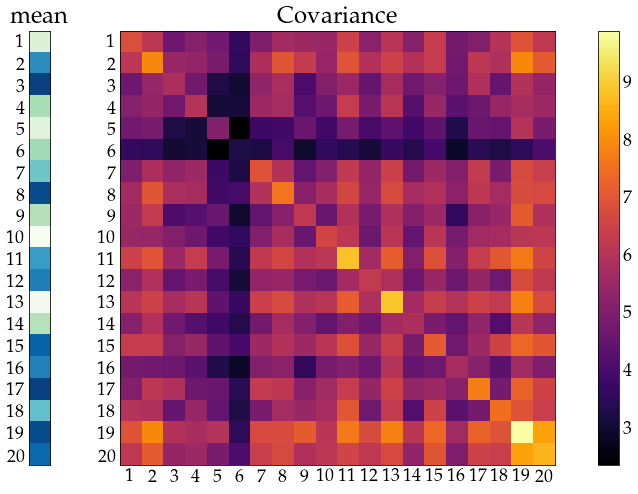

In [4]:
show_covariance(mean_vec=unrestr_mean, cov_mat=unrestr_cov)

remember: symmetry of $\Sigma$

### Hopeless without resrtictions - structure on $\mu, ~\Sigma$

* independent

$$\begin{bmatrix}Z_1\\Z_2\\Z_3\\\vdots\\Z_K\end{bmatrix} 
\sim \mathcal{N} \left(
\begin{bmatrix}\mu_1\\\mu_2\\\mu_3\\\vdots\\\mu_K\end{bmatrix},
\begin{pmatrix}
\Sigma(1,1) & 0 & 0 & \cdots & 0\\
0 & \Sigma(2,2) & 0 & \cdots &  \vdots\\
0 & 0 & \Sigma(3,3) & \cdots &  \vdots\\
\vdots & \vdots & \vdots & \cdots &  \vdots\\
0 & \cdots & \cdots  & \cdots & \Sigma(K,K)\\
\end{pmatrix}
\right)
$$

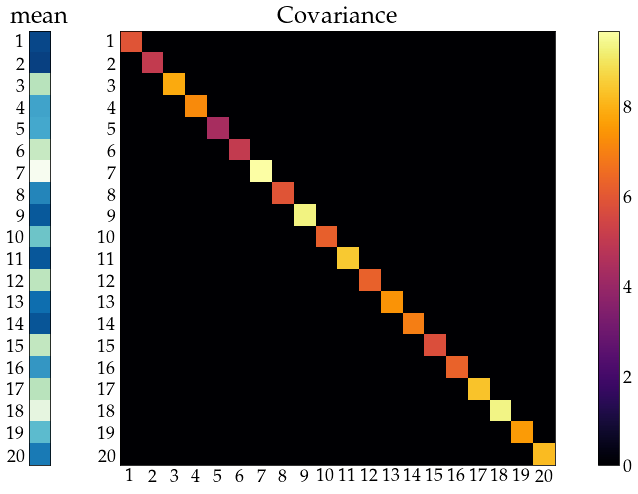

In [53]:
show_covariance(mean_vec=unrestr_mean, cov_mat=np.diagflat(unrestr_cov.diagonal()))

* ... and identically distributed

$$\begin{bmatrix}Z_1\\Z_2\\Z_3\\\vdots\\Z_K\end{bmatrix} 
\sim \mathcal{N} \left(
\begin{bmatrix}\mu\\\mu\\\mu\\\vdots\\\mu\end{bmatrix},
\begin{pmatrix}
\Sigma & 0 & 0 & \cdots & 0\\
0 & \Sigma & 0 & \cdots &  \vdots\\
0 & 0 & \Sigma & \cdots &  \vdots\\
\vdots & \vdots & \vdots & \cdots &  \vdots\\
0 & \cdots & \cdots  & \cdots & \Sigma\\
\end{pmatrix}
\right)
$$

Note: small $\mu$ and $\Sigma$ - not the moments of full joint distribution above

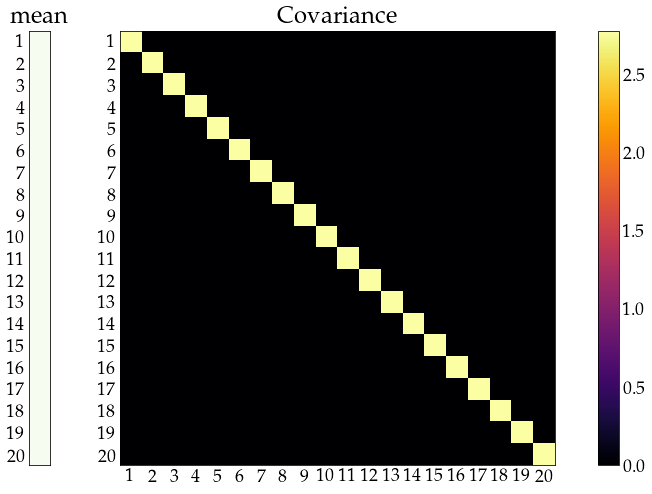

In [54]:
show_covariance(mean_vec=np.ones((n_obs, 1)) ,cov_mat=np.diagflat(Sigma.diagonal()));

## time series

* distribution ($\mu$, and $\Sigma$) is time-invariant (**_stationarity_**)

* dependence - not too strong and weaker for distant elements (**_ergodicity_**)

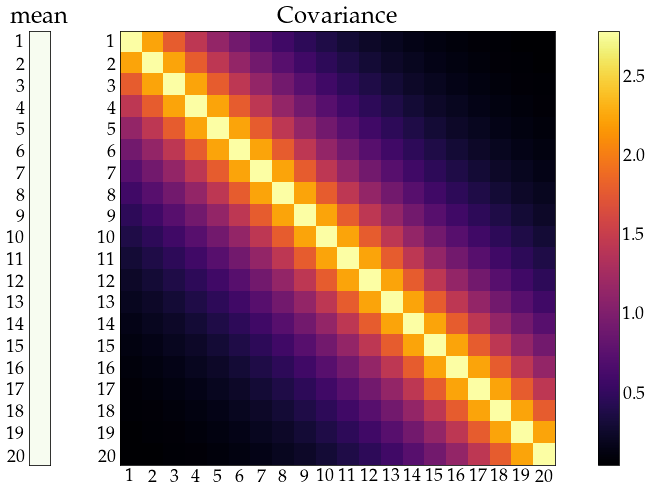

In [56]:
show_covariance(mean_vec=np.ones((n_obs, 1)) ,cov_mat=Sigma);

## time series models

* represent temporal dependence in a parsimonious way

  - AR (1) model: 
  
  $$z_t = \alpha z_{t-1} + \varepsilon_t$$
  
  - MA(1) model:
  
   $$z_t = \varepsilon_t + \psi \varepsilon_{t-1}$$
   
  - ARMA(1,1) model:
  
   $$z_t = \alpha z_{t-1} + \varepsilon_t + \psi \varepsilon_{t-1}$$
   
  - etc.
   
* represent temporal interdependence among multiple variables in a parsimonious way

  - VAR (1) model
  - VMA(1) model  
  - VARMA(1,1) model
  - etc.

## Consequence of dependence

* information accumulates more slowly - need different statistical theory to justify methods

* forecast the future using the past